In [1]:
#IMPORT LIBRARY

import json
import os
import math
import librosa
import numpy as np
import pandas as pd

In [2]:
#INISIASI DIRECTORY

DATASET_PATH = "D:/SKRISPY/emosi"
JSON_PATH = "hasil.json"

#INISIASI PAARAMETER EKSTRASI CIRI
SAMPLE_RATE = 44100
TRACK_DURATION = 3 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
PREEMPHASIS = 0.97
FMIN = 0
FMAX = int(SAMPLE_RATE/2)
N_MELS = 40
WINDOW = 'hamming'

In [3]:
#EKSTRAKSI CIRI

def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

def do_preemphasis (audio, preemphasis=PREEMPHASIS):
    audio = np.append(audio[0], audio[1:]- PREEMPHASIS * audio[:-1] )
    return audio


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, preemphasis=PREEMPHASIS, fmin=FMIN, fmax=FMAX, n_mels=N_MELS, window=WINDOW, num_segments=1):
    
    # TEMPAT UNTUK MENYIMPAN LABELS, DAN MFCC
    data = {
        "path": [],
        "emosi": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # LOOP SEMUA SUB FOLDER EMOSI
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):


        if dirpath is not dataset_path:

            # MENYIMPAN LABEL EMOSI DALAM MAPPING
            semantic_label = dirpath.split("/")[-1]
            data["path"].append(semantic_label)
            print("\nProses: {}".format(semantic_label))

            # memproses semua file audio dalam sub-dir emosi
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # Pre emphasis
                normalized = normalize_audio(signal)
                emphasized_signal = do_preemphasis(normalized)
                
                # memproses semua segmen file audio
                for d in range(num_segments):

                    # menghitung sampel mulai dan selesai untuk segmen saat ini
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # ekstraksi dengan mfcc
                    mfcc = librosa.feature.mfcc(emphasized_signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # simpan hanya fitur mfcc dengan jumlah vektor yang diharapkan
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["emosi"].append(i-1)
                        print("{}, segmen:{}".format(file_path, d+1))

    # simpan MFCC ke dalam file json
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=1)


Proses: emosi\0_Netral
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-01.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-02.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-03.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-04.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-05.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-06.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-07.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-08.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-09.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-10.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-11.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-12.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-13.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-14.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-15.wav, segmen:1
D:/SKRISPY/emosi\0_Netral\03-01-01-01-01-01-16.wav, segmen:1


D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-17.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-18.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-19.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-20.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-21.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-22.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-23.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-01-02-24.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-02.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-03.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-04.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-05.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-06.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-07.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-08.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-01-02-01-09.wav, segmen:1
D:/SKRISPY/emosi\1_Tenan

D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-15.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-16.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-17.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-18.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-19.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-20.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-21.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-22.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-23.wav, segmen:1
D:/SKRISPY/emosi\1_Tenang\03-01-02-02-02-02-24.wav, segmen:1

Proses: emosi\2_Senang
D:/SKRISPY/emosi\2_Senang\03-01-03-01-01-01-01.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-01-01-01-02.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-01-01-01-03.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-01-01-01-04.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-01-01-01-05.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-01-01-01-06.wav, segmen:1


D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-05.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-06.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-07.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-08.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-09.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-10.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-11.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-12.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-13.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-14.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-15.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-16.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-17.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-18.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-19.wav, segmen:1
D:/SKRISPY/emosi\2_Senang\03-01-03-02-01-02-20.wav, segmen:1
D:/SKRISPY/emosi\2_Senan

D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-01-21.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-01-22.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-01-23.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-01-24.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-01.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-02.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-03.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-04.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-05.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-06.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-07.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-08.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-09.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-10.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-11.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-02-12.wav, segmen:1
D:/SKRISPY/emosi\3_Sedih\03-01-04-01-02-

D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-14.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-15.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-16.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-17.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-18.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-19.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-20.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-21.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-22.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-23.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-01-24.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-02-01.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-02-02.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-02-03.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-02-04.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-02-05.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-01-01-

D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-07.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-08.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-09.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-10.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-11.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-12.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-13.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-14.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-15.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-16.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-17.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-18.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-19.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-20.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-21.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-01-22.wav, segmen:1
D:/SKRISPY/emosi\4_Marah\03-01-05-02-02-

D:/SKRISPY/emosi\5_Takut\03-01-06-01-02-02-24.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-01.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-02.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-03.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-04.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-05.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-06.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-07.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-08.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-09.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-10.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-11.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-12.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-13.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-14.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-01-15.wav, segmen:1
D:/SKRISPY/emosi\5_Takut\03-01-06-02-01-

D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-17.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-18.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-19.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-20.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-21.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-22.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-23.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-01-02-24.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-01.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-02.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-03.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-04.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-05.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-06.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-07.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-01-08.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-01-02-

D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-10.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-11.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-12.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-13.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-14.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-15.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-16.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-17.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-18.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-19.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-20.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-21.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-22.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-23.wav, segmen:1
D:/SKRISPY/emosi\6_Jijik\03-01-07-02-02-02-24.wav, segmen:1

Proses: emosi\7_Terkejut
D:/SKRISPY/emosi\7_Terkejut\03-01-08-01-01-01-01.wav, segmen:1
D:/SKRISPY/

D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-01-22.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-01-23.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-01-24.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-01.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-02.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-03.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-04.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-05.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-06.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-07.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-08.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-09.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-10.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-11.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-12.wav, segmen:1
D:/SKRISPY/emosi\7_Terkejut\03-01-08-02-01-02-13.wav, s

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt


DATA_PATH = "D:/SKRISPY/hasil.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # mengonversi list menjadi array
    X = np.array(data["mfcc"])
    y = np.array(data["emosi"])

    print("Data succesfully loaded!")

    return  X, y


if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)



Data succesfully loaded!


In [2]:
#Mengecek jumlah data hasil ekstraksi

X.shape, y.shape,

((1430, 259, 13), (1430,))

Data succesfully loaded!
Data succesfully loaded!
Epoch 1/10
72/72 [==============================] - 0s 7ms/step - loss: 43.0168 - accuracy: 0.1993 - val_loss: 16.5052 - val_accuracy: 0.3531
Epoch 2/10
72/72 [==============================] - 0s 4ms/step - loss: 16.5533 - accuracy: 0.3138 - val_loss: 23.2232 - val_accuracy: 0.2063
Epoch 3/10
72/72 [==============================] - 0s 4ms/step - loss: 13.4061 - accuracy: 0.3558 - val_loss: 12.8389 - val_accuracy: 0.2832
Epoch 4/10
72/72 [==============================] - 0s 4ms/step - loss: 8.0549 - accuracy: 0.3969 - val_loss: 11.1533 - val_accuracy: 0.3077
Epoch 5/10
72/72 [==============================] - 0s 4ms/step - loss: 5.4921 - accuracy: 0.4615 - val_loss: 9.2192 - val_accuracy: 0.2972
Epoch 6/10
72/72 [==============================] - 0s 5ms/step - loss: 4.3901 - accuracy: 0.5070 - val_loss: 9.5219 - val_accuracy: 0.3147
Epoch 7/10
72/72 [==============================] - 0s 4ms/step - loss: 5.7007 - accuracy: 0.4633 - val

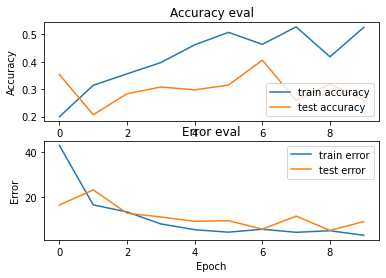

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3367)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                215552    
_________________________________________________________________
dense_28 (Dense)             (None, 42)                2730      
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 344       
Total params: 218,626
Trainable params: 218,626
Non-trainable params: 0
_________________________________________________________________
Waktu Eksekusi: 0.0 detik


In [13]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt



DATA_PATH = "D:/SKRISPY/hasil.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # mengonversi list menjadi array
    X = np.array(data["mfcc"])
    y = np.array(data["emosi"])

    print("Data succesfully loaded!")

    return  X, y

 # Mendefinisi pembagian data
    
def prepare_datasets(validation_size):
    
        X, y = load_data(DATA_PATH)
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size)
        
        return X_train, X_validation, y_train, y_validation


# Mendifinisi model

def build_model(): 
    model = keras.Sequential([

     # Input layer
   keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

         # Hidden layer pertama
        keras.layers.Dense(256, activation='relu'),
        
        # Hidden layer kedua
        keras.layers.Dense(64, activation='relu'),

        # Output layer
        keras.layers.Dense(8, activation='softmax')
    
    ])
    return model
    
    
# Mendifinisi plot
    
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # Membuat accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Membuat error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

   
    

if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # Pembagian data
    X_train, X_test, y_train, y_test = prepare_datasets(0.20)

    # Membuat model
    model = keras.Sequential([

     # Input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),


       # Hidden layer pertama
        keras.layers.Dense(256, activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)),
        keras.layers.Dropout(0.3),
        
        # Hidden layer kedua
        keras.layers.Dense(128, activation='relu'),
        

        # Output layer
        keras.layers.Dense(8, activation='softmax')
    
    ])

       
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    
    # Proses pelatihan model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=100)
    
    # plot accuracy dan error
    plot_history(history)
    
    
    # Menghitung waktu pelatihan
    
    model.summary()

    import time
    
    start = time.time()
    
    end = time.time()
    durasi = end-start
    
    if durasi <60:
        print("Waktu Eksekusi:", durasi, "detik")
    elif durasi >60 and durasi < 3600:
        durasi = durasi/60
        print("Waktu Eksekusi:", durasi, "menit")
    else:
        durasi = durasi/(60*60)
        print("Waktu Eksekusi:", durasi, "jam")
        



    

In [4]:
# Mengecek jumlah pembagian data

X_train.shape,y_train.shape,X_test.shape, y_test.shape,

((1144, 259, 13), (1144,), (286, 259, 13), (286,))

In [5]:
# Menyimpan bobot model

model.save('my_model.h5')

In [6]:
# Load bobot model

from keras.models import load_model

model_path = 'D:/SKRISPY/my_model.h5'
new_model = keras.models.load_model(model_path)

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Deni\AppData\Local\Programs\Python\Python37\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
# Pengujian model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from jcopml.pipeline import num_pipe, cat_pipe

DATA_PATH = "D:/SKRISPY/hasil.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["emosi"])

    return  X, y
X, y = load_data (DATA_PATH)

X_train, X_test, y_train, y_test = prepare_datasets(0.20)


X_test, y_test = X_test, y_test
X_test = X_test [..., np.newaxis]


def predict (model, X_test, y_test):
    X_test = X_test [...]
    prediction = model.predict(X_test)
    predicted_index = np.argmax(prediction, axis = 1)
    
    print ("Emosi:{}, Prediksi Emosi: {}".format(y, predicted_index))
    
    return predicted_index
    
    from keras.models import load_model

model_path = 'D:/SKRISPY/my_model.h5'
new_model = keras.models.load_model(model_path)
    
X_to_predict = X_test [:]
y_to_predict = y_test [:]

predicted = predict(model, X_to_predict, y_to_predict)
actual = y_to_predict

Emosi:[0 0 0 ... 7 7 7], Prediksi Emosi: [5 3 1 1 2 2 2 6 1 4 3 3 6 4 4 7 7 7 4 6 2 7 2 3 4 2 2 6 7 5 2 2 7 5 4 7 2
 5 2 2 2 2 2 1 2 7 1 4 2 6 3 4 5 5 2 7 2 5 2 2 6 4 5 2 2 1 2 2 2 3 6 4 1 2
 2 2 5 5 4 2 2 3 2 6 7 4 4 5 3 4 4 6 2 1 2 4 2 6 2 2 2 2 6 2 1 3 4 2 5 4 6
 2 2 7 2 7 2 2 5 2 6 2 2 4 7 6 5 7 3 4 1 2 1 6 2 2 4 4 6 6 2 0 6 4 4 5 1 2
 7 2 2 2 7 2 7 2 7 4 2 4 5 2 2 2 2 7 4 5 2 7 5 1 7 2 2 5 4 4 2 2 5 5 2 7 2
 2 2 4 7 3 5 7 4 2 2 1 3 6 3 5 6 7 7 6 1 4 2 5 3 7 2 2 3 4 2 2 5 4 2 4 6 2
 4 7 5 5 2 1 7 4 7 6 3 0 7 7 4 2 4 4 4 2 3 2 4 3 4 3 4 5 2 7 3 2 2 2 4 2 4
 7 2 4 5 1 1 5 2 7 7 2 2 1 2 7 1 2 2 4 2 2 2 2 2 3 5 4]


[[ 1  2  9  0  0  1  0  0]
 [ 0 13 16  8  1  1  1  0]
 [ 0  0 16  1  8  7  0  6]
 [ 1  3 24  4  0  7  0  0]
 [ 0  1  7  0 32  1  4  4]
 [ 0  0  6  2  6  9  2  7]
 [ 0  1 16  4  2  0 13  0]
 [ 0  0  9  2  0  5  3 20]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        13
           1       0.65      0.33      0.43        40
           2       0.16      0.42      0.23        38
           3       0.19      0.10      0.13        39
           4       0.65      0.65      0.65        49
           5       0.29      0.28      0.29        32
           6       0.57      0.36      0.44        36
           7       0.54      0.51      0.53        39

    accuracy                           0.38       286
   macro avg       0.44      0.34      0.35       286
weighted avg       0.45      0.38      0.39       286



NameError: name 'ax' is not defined

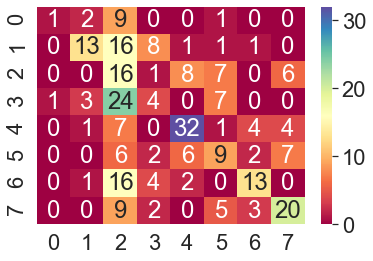

In [8]:
# Evaluasi model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
sns.set(font_scale = 2)


result = confusion_matrix(actual, predicted)

print (result)

from sklearn.metrics import classification_report

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted)

#Plot the matrix
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral")
 
# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS')
ax.set_ylabel('PREDICTED LABELS') 
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(['Netral', 'Tenang','Senang', 'Sedih','Marah','Takut','Jijik','Terkejut'])
ax.yaxis.set_ticklabels(['Netral', 'Tenang','Senang', 'Sedih','Marah','Takut','Jijik','Terkejut'])